# Знакомство с языком Python (семинары)
## Урок 11. Jupyter Notebook и несколько слов об аналитике

### Задание 1
Дана функция:
f(x) = -12x^4\*sin(cos(x)) - 18x^3+5x^2 + 10x - 30
Требуется:
1. Определить корни 
2. Найти интервалы, на которых функция возрастает 
3. Найти интервалы, на которых функция убывает 
4. Построить график 
5. Вычислить вершину 
6. Определить промежутки, на котором f > 0 
7. Определить промежутки, на котором f < 0 

In [68]:
import sympy as sym
from sympy import symbols, latex, diff, S
from sympy.solvers import solve, nsolve
from sympy.plotting import plot
from sympy import sin, cos

sym.init_printing(use_latex='mathjax')

In [93]:
x = symbols('x') # ,real=True

f = -12*x**4*sin(cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30
#f = -12*x**4 - 18*x**3 + 5*x**2 + 10*x - 30
#f = -12*x**4*sin(x) -18
f

      4                   3      2            
- 12⋅x ⋅sin(cos(x)) - 18⋅x  + 5⋅x  + 10⋅x - 30

## 1. Находим корни функции (ищем значения x, при которых f(x)=0)

In [94]:
solve(f, x) # implicit=True

NotImplementedError: multiple generators [x, sin(cos(x))]
No algorithms are implemented to solve equation -12*x**4*sin(cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30

Действительных корней нет - функция не пересекает ось OX

## 2,3. Интервалы, на которых функция возрастает и убывает:

In [31]:
f1 = diff(f)
f1 # производная


-48*x**3 - 54*x**2 + 10*x + 10

In [32]:
extremum_x = solve(f1,x) # значение X в точке экстремума
extremum_x[0].n()

-0.41435290273377 + 0.e-23*I

т.к. функция симметричная (в ней есть модуль) - то точка экстремума так же будет симметрична. Так же точкой экстремума будет точка 0  

In [33]:
print(f.subs(x,-extremum_x[0]).n()) #
print(f.subs(x,0).n())
print(f.subs(x,extremum_x[0]).n())

-26.6322639436467 + 0.e-22*I
-30.0000000000000
-32.3582979436609 - 0.e-22*I


In [34]:
print(f1.subs(x,-2))
print(f1.subs(x,-0.2))
print(f1.subs(x,0.2))
print(f1.subs(x,2))


158
6.22400000000000
9.45600000000000
-570


На промежутке от -oo до -extremum_x[0] - производная отрицательная - функция f(x) - убывает
На промежутке от -extremum_x[0] до 0 - производная положительная - функция f(x) - возрастает
На промежутке от 0 до extremum_x[0] - производная отрицательная - функция f(x) - убывает
На промежутке от extremum_x[0] до +oo - производная положительная - функция f(x) - возрастает


## 4. Построить график 

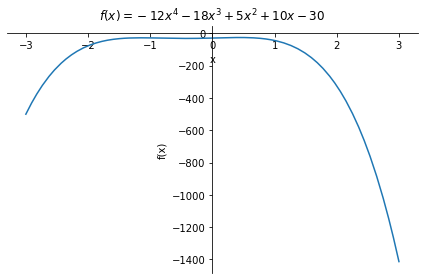

In [35]:
str= latex(S(f,evaluate = False))
p = plot(f,(x,-3,3),title='$'+'f(x)='+str+'$', show=  False)
p.show()

## 5. Вычислить вершину

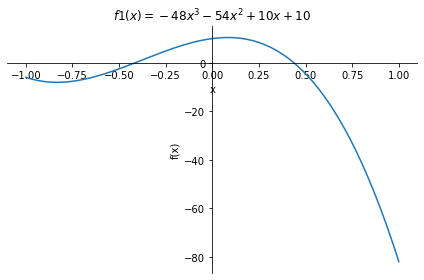

In [36]:
str= latex(S(f1,evaluate = False))
p = plot(f1,(x,-1,1), title = '$'+'f1(x)='+str+'$', show = False) # график производной
p.show()

В точке x=0 производная функции имеет точку разрыва. Примем точку x = 0 вершиной функции. И вычислим ее значение

In [37]:
f.subs(x,0)

-30

Точка (0; 8) - вершина функции

## 6, 7. Определить промежутки, на котором f > 0 и f < 0

Функция f(x) - не имеет действительных корней, соответственно функция не пересекает ось OX. Т. е. функция на всем своем промежутке определения или положительна, или отрицательна. Вычислим любое ее значение.

In [38]:
f.subs(x,0)

-30

Ответ - положительный. Функция положительна на всем промежутке ее определения от -oo до +oo